In [33]:
import cv2

In [34]:
import matplotlib.pyplot as plt

In [35]:
config_file = r"C:\Users\gskee\Downloads\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = r"C:\Users\gskee\Downloads\frozen_inference_graph.pb"


In [36]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)


In [37]:
classLabels = []
file_name = r"C:\Users\gskee\Downloads\coco.text"

with open(file_name, 'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')


In [38]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [39]:
print(len(classLabels))

80


In [40]:
# Set input size for the model
model.setInputSize(320, 320)

# Normalize the input image
model.setInputScale(1.0 / 127.5)  # Scale factor for normalization

# Mean subtraction
model.setInputMean((127.5, 127.5, 127.5))  # Mean values for each channel

# Swap Red and Blue channels (used in some models that expect BGR format)
model.setInputSwapRB(True)


< cv2.dnn.Model 000002F101015790>

In [41]:
img=cv2.imread(r"C:\Users\gskee\Downloads\p1.jpg")

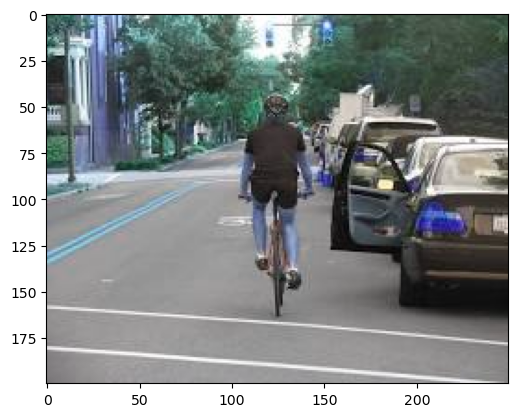

In [42]:
plt.imshow(img)

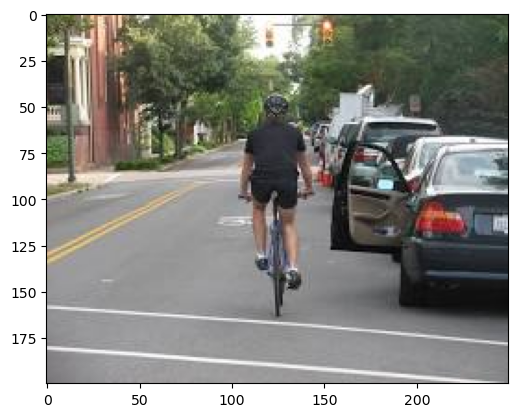

In [43]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [44]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5)


In [45]:
print(ClassIndex)

[ 1  3  3 10  3  2]


In [46]:
font_scale=1
font=cv2.FONT_HERSHEY_DUPLEX
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness=2)


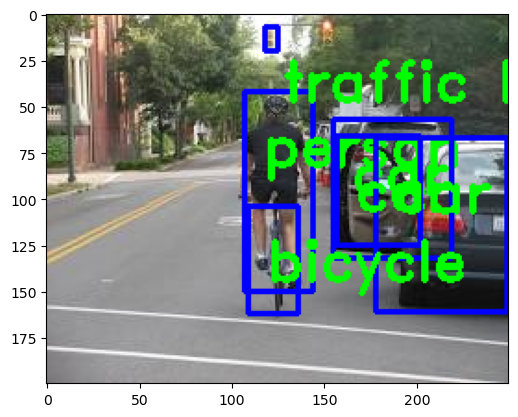

In [47]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))